Raisyad Jullfikar 2106238

In [112]:
# Export Library
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import xgboost as xgb
import joblib
import pickle
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
# Import data pmi
df_pmiTarget = pd.read_csv("C:\\Users\\raisy\\Downloads\\dataset_uas_datamining_jan_23\\pmi.csv")

In [3]:
# Cek jumlah data dan type data dari dataset kelas target
df_pmiTarget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   prov          442 non-null    object
 1   tahun         442 non-null    int64 
 2   kategori_pmi  442 non-null    object
dtypes: int64(1), object(2)
memory usage: 10.5+ KB


In [4]:
# Mengecek data kosong
df_pmiTarget.isnull().count()

prov            442
tahun           442
kategori_pmi    442
dtype: int64

In [5]:
# Menampilkan sebagian kecil data
df_pmiTarget.head(5)

,prov,tahun,kategori_pmi
0,ACEH,2022,TINGGI
1,SUMATERA UTARA,2022,TINGGI
2,SUMATERA BARAT,2022,TINGGI
3,RIAU,2022,TINGGI
4,JAMBI,2022,TINGGI


In [106]:
# Mengecek data unique dari kolom kategori
df_pmiTarget['kategori_pmi'].unique()

array(['TINGGI', 'SANGAT TINGGI', 'SEDANG', 'SANGAT RENDAH'], dtype=object)

In [6]:
# Import data kepadatan
df_Kepadatan = pd.read_csv("C:\\Users\\raisy\\Downloads\\dataset_uas_datamining_jan_23\\kepadatan_penduduk.csv")

In [7]:
# Cek jumlah data dan type data dari dataset kepadatan
df_Kepadatan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   prov                280 non-null    object
 1   tahun               280 non-null    int64 
 2   kepadatan_penduduk  280 non-null    object
dtypes: int64(1), object(2)
memory usage: 6.7+ KB


In [8]:
# Tampilkan sebagian kecil data
df_Kepadatan.head(5)

,prov,tahun,kepadatan_penduduk
0,ACEH,2021,92
1,SUMATERA UTARA,2021,205
2,SUMATERA BARAT,2021,133
3,RIAU,2021,75
4,JAMBI,2021,72


In [9]:
# Import data persen rumah menyewa
df_RumahSewa = pd.read_csv("C:\\Users\\raisy\\Downloads\\dataset_uas_datamining_jan_23\\persen_rumah_menyewa.csv")

In [10]:
# Cek jumlah Data dan type datanya dari dataset rumah sewa
df_RumahSewa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tahun                 245 non-null    int64  
 1   persen_rumah_menyewa  245 non-null    float64
 2   prov                  245 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 5.9+ KB


In [11]:
# Tampilkan sebagian kecil data
df_RumahSewa.head(5)

,tahun,persen_rumah_menyewa,prov
0,2021,6.86,ACEH
1,2021,14.13,SUMATERA UTARA
2,2021,11.37,SUMATERA BARAT
3,2021,11.82,RIAU
4,2021,5.95,JAMBI


In [12]:
# Gabungkan data kelas target dengan rumah sewa
df_merge_1 = pd.merge(df_pmiTarget, df_RumahSewa, on=["tahun", "prov"], how='left')

In [13]:
# Cek jumlah data dan type data dari merge pertama
df_merge_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 441
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   prov                  442 non-null    object 
 1   tahun                 442 non-null    int64  
 2   kategori_pmi          442 non-null    object 
 3   persen_rumah_menyewa  238 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 17.3+ KB


In [14]:
# Tampilkan sebagian kecil data dari merge 1
df_merge_1.head(5)

,prov,tahun,kategori_pmi,persen_rumah_menyewa
0,ACEH,2022,TINGGI,NaN
1,SUMATERA UTARA,2022,TINGGI,NaN
2,SUMATERA BARAT,2022,TINGGI,NaN
3,RIAU,2022,TINGGI,NaN
4,JAMBI,2022,TINGGI,NaN


In [15]:
# Merge kembali data dari merge pertama dengan df kepadatan
df_gabung = pd.merge(df_merge_1, df_Kepadatan, on=["tahun", "prov"], how='left')

In [16]:
# cek kembali jumlah data dan type data
df_gabung.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 441
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   prov                  442 non-null    object 
 1   tahun                 442 non-null    int64  
 2   kategori_pmi          442 non-null    object 
 3   persen_rumah_menyewa  238 non-null    float64
 4   kepadatan_penduduk    272 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 20.7+ KB


In [17]:
# Tampilkan data
df_gabung.head(5)

,prov,tahun,kategori_pmi,persen_rumah_menyewa,kepadatan_penduduk
0,ACEH,2022,TINGGI,NaN,NaN
1,SUMATERA UTARA,2022,TINGGI,NaN,NaN
2,SUMATERA BARAT,2022,TINGGI,NaN,NaN
3,RIAU,2022,TINGGI,NaN,NaN
4,JAMBI,2022,TINGGI,NaN,NaN


In [18]:
# Cek jumlah null
df_gabung.isna().sum()

prov                      0
tahun                     0
kategori_pmi              0
persen_rumah_menyewa    204
kepadatan_penduduk      170
dtype: int64

In [19]:
# Import data persen anak dengan akte lahir
df_persenAnak = pd.read_csv("C:\\Users\\raisy\\Downloads\\dataset_uas_datamining_jan_23\\persen_anak_dengan_akte_lahir.csv")

In [20]:
# Cek jumlah data dan type data
df_persenAnak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tahun                          245 non-null    int64  
 1   persen_anak_dengan_akte_lahir  245 non-null    float64
 2   prov                           245 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 5.9+ KB


In [21]:
# Tampilkan data
df_persenAnak.head(5)

,tahun,persen_anak_dengan_akte_lahir,prov
0,2021,94.52,ACEH
1,2021,83.02,SUMATERA UTARA
2,2021,91.38,SUMATERA BARAT
3,2021,84.25,RIAU
4,2021,93.37,JAMBI


In [22]:
# Gabungkan data dari merge kedua (df_gabung) dengan df persen anak
df_gabung_2 = pd.merge(df_gabung, df_persenAnak, on=["tahun", "prov"], how='left')

In [23]:
# tampilkan hasil datanya
df_gabung_2

,prov,tahun,kategori_pmi,persen_rumah_menyewa,kepadatan_penduduk,persen_anak_dengan_akte_lahir
0,ACEH,2022,TINGGI,NaN,NaN,NaN
1,SUMATERA UTARA,2022,TINGGI,NaN,NaN,NaN
2,SUMATERA BARAT,2022,TINGGI,NaN,NaN,NaN
3,RIAU,2022,TINGGI,NaN,NaN,NaN
4,JAMBI,2022,TINGGI,NaN,NaN,NaN
...,...,...,...,...,...,...
437,SULAWESI BARAT,2010,SANGAT RENDAH,NaN,69,NaN
438,MALUKU,2010,SEDANG,NaN,33,NaN
439,MALUKU UTARA,2010,SEDANG,NaN,33,NaN
440,PAPUA BARAT,2010,SANGAT RENDAH,NaN,8,NaN


In [24]:
# Cek data nya
df_gabung_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 441
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   prov                           442 non-null    object 
 1   tahun                          442 non-null    int64  
 2   kategori_pmi                   442 non-null    object 
 3   persen_rumah_menyewa           238 non-null    float64
 4   kepadatan_penduduk             272 non-null    object 
 5   persen_anak_dengan_akte_lahir  238 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 24.2+ KB


In [25]:
# Cek jumlah nullnya
df_gabung_2.isna().sum()

prov                               0
tahun                              0
kategori_pmi                       0
persen_rumah_menyewa             204
kepadatan_penduduk               170
persen_anak_dengan_akte_lahir    204
dtype: int64

In [26]:
# Proses ubah type data, disini diubah kedalam type category karena, menurut saya dari kolom dibawah, type data yg cocok
# adalah type data category, kecuali kepadatan penduduk
df_gabung_2['kepadatan_penduduk'] = df_gabung_2['kepadatan_penduduk'].astype('category')
df_gabung_2['prov'] = df_gabung_2['prov'].astype('category')
df_gabung_2['kategori_pmi'] = df_gabung_2['kategori_pmi'].astype('category')

In [27]:
# Proses mengubah kolom kepdatan kedalam bentuk int
df_gabung_2['kepadatan_penduduk'] = pd.to_numeric(df_gabung_2['kepadatan_penduduk'], errors='coerce').convert_dtypes()

In [28]:
df_gabung_2.head(5)

,prov,tahun,kategori_pmi,persen_rumah_menyewa,kepadatan_penduduk,persen_anak_dengan_akte_lahir
0,ACEH,2022,TINGGI,NaN,<NA>,NaN
1,SUMATERA UTARA,2022,TINGGI,NaN,<NA>,NaN
2,SUMATERA BARAT,2022,TINGGI,NaN,<NA>,NaN
3,RIAU,2022,TINGGI,NaN,<NA>,NaN
4,JAMBI,2022,TINGGI,NaN,<NA>,NaN


In [29]:
# Cek mean dari data yang null atau yang akan dipraproses
df_gabung_2['kepadatan_penduduk'].mean()

720.8

In [30]:
# Cek modus dari data yang akan dipraproses
df_gabung_2['kepadatan_penduduk'].mode()[0]

9

In [31]:
# Cek median dari data yang akan dipraproses
df_gabung_2['kepadatan_penduduk'].median()

98.5

In [32]:
# Menampilkan data yang mana masih menunjukkan ada data yang kosong
df_gabung_2['kepadatan_penduduk'].head(50)

0      <NA>
1      <NA>
2      <NA>
3      <NA>
4      <NA>
5      <NA>
6      <NA>
7      <NA>
8      <NA>
9      <NA>
10     <NA>
11     <NA>
12     <NA>
13     <NA>
14     <NA>
15     <NA>
16     <NA>
17     <NA>
18     <NA>
19     <NA>
20     <NA>
21     <NA>
22     <NA>
23     <NA>
24     <NA>
25     <NA>
26     <NA>
27     <NA>
28     <NA>
29     <NA>
30     <NA>
31     <NA>
32     <NA>
33     <NA>
34       92
35      205
36      133
37       75
38       72
39       93
40      102
41      262
42       90
43      258
44    15978
45     1379
46     1120
47     1185
48      855
49     1248
Name: kepadatan_penduduk, dtype: Int64

Karena data yang ada pada kolom kepadatan penduduk itu lumayan besar, maka dari itu saya memutuskan untuk mengisi data kosong pada kolom kepadatan dengan rata rata, karena, asumsi kolom kepadatan menurut saya, bisa ditarik memakai data rata ratanya

In [33]:
tempNa = df_gabung_2.dropna()

In [34]:
tempNa['kepadatan_penduduk'].head(15)

34       92
35      205
36      133
37       75
38       72
39       93
40      102
41      262
42       90
43      258
44    15978
45     1379
46     1120
47     1185
48      855
Name: kepadatan_penduduk, dtype: Int64

proses diatas merupakan penunjukkan data dari kolom kepadatan

In [35]:
# Proses mengisi data null dengan mean
df_gabung_2['kepadatan_penduduk'] = df_gabung_2['kepadatan_penduduk'].fillna(value=int(df_gabung_2['kepadatan_penduduk'].mean()), inplace=False)

In [36]:
df_gabung_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 441
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   prov                           442 non-null    category
 1   tahun                          442 non-null    int64   
 2   kategori_pmi                   442 non-null    category
 3   persen_rumah_menyewa           238 non-null    float64 
 4   kepadatan_penduduk             442 non-null    Int64   
 5   persen_anak_dengan_akte_lahir  238 non-null    float64 
dtypes: Int64(1), category(2), float64(2), int64(1)
memory usage: 20.1 KB


In [37]:
df_gabung_2['kepadatan_penduduk'].head(15)

0     720
1     720
2     720
3     720
4     720
5     720
6     720
7     720
8     720
9     720
10    720
11    720
12    720
13    720
14    720
Name: kepadatan_penduduk, dtype: Int64

In [38]:
# Mengecek mean dari kolom tertentu
df_gabung_2['persen_rumah_menyewa'].mean()

9.61

In [39]:
# Mengisi data null dengan mean
df_gabung_2['persen_rumah_menyewa'] = df_gabung_2['persen_rumah_menyewa'].fillna(value=int(df_gabung_2['persen_rumah_menyewa'].mean()), inplace=False)

In [40]:
df_gabung_2['persen_rumah_menyewa'][35]

14.13

In [41]:
# mengisi data kolom tertentu dengan mean
df_gabung_2['persen_anak_dengan_akte_lahir'] = df_gabung_2['persen_anak_dengan_akte_lahir'].fillna(value=int(df_gabung_2['persen_anak_dengan_akte_lahir'].mean()), inplace=False)

In [42]:
df_gabung_2['persen_anak_dengan_akte_lahir'][35]

83.02

In [43]:
df_gabung_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 441
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   prov                           442 non-null    category
 1   tahun                          442 non-null    int64   
 2   kategori_pmi                   442 non-null    category
 3   persen_rumah_menyewa           442 non-null    float64 
 4   kepadatan_penduduk             442 non-null    Int64   
 5   persen_anak_dengan_akte_lahir  442 non-null    float64 
dtypes: Int64(1), category(2), float64(2), int64(1)
memory usage: 36.2 KB


boxplot dibawah ini saya gunakan untuk melihat outlier atau nilai ekstrim, dan seperti yang ditunjukkan grafik pada gambar dibawah, dari nilai persen masih terdapat nilai esktrimnya

<AxesSubplot:xlabel='persen_rumah_menyewa'>

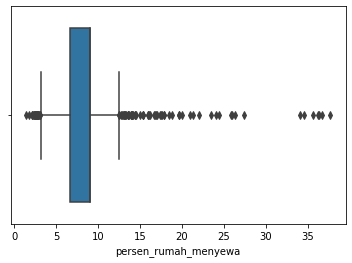

In [44]:
sns.boxplot(x="persen_rumah_menyewa",data=df_gabung_2)

In [46]:
# Menampilkan data uniq
df_gabung_2['persen_rumah_menyewa'].unique()

array([ 9.  ,  6.86, 14.13, 11.37, 11.82,  5.95,  6.18,  7.03,  3.92,
        7.31, 25.95, 34.63,  9.5 ,  2.62, 13.98,  4.55, 11.3 , 19.63,
        3.05,  6.42,  3.48,  7.22,  8.19, 16.7 , 16.19,  6.13,  6.06,
        4.71,  4.29,  3.9 ,  1.41,  8.67,  6.67, 11.19,  7.87,  6.98,
       12.54, 11.44, 13.61,  5.83,  5.13,  7.49,  4.16,  5.76, 26.29,
       37.71, 10.68,  2.56, 15.01,  5.65, 11.62, 22.03,  3.38,  5.93,
        2.86,  7.57,  9.91, 17.44, 14.09,  5.64,  5.61,  5.31,  5.3 ,
        2.46,  2.15,  7.29,  6.63, 13.35,  8.47,  6.69, 14.02, 11.93,
       15.4 ,  6.53,  6.09,  7.74,  4.2 ,  5.92, 24.03, 36.36, 11.11,
        2.91, 17.53,  6.02, 12.35, 21.03,  3.1 ,  6.  ,  3.19, 10.98,
       16.97, 15.94,  6.43,  6.25,  5.2 ,  4.65,  2.16,  6.5 ,  7.36,
       14.5 ,  8.85, 12.87, 12.51, 16.  ,  7.06,  7.59,  3.96,  5.25,
       23.48, 35.63, 10.5 ,  2.85, 13.71,  5.97, 12.48, 19.99,  3.47,
        6.17,  3.39,  7.99, 10.66, 17.9 , 17.69,  6.66,  5.99,  5.36,
        5.8 ,  2.92,

In [47]:
# Mengimport kembali data melek dan kalori
df_melekhuruf = pd.read_csv("C:\\Users\\raisy\\Downloads\\dataset_uas_datamining_jan_23\\melek_huruf_diatas15.csv")
df_persenkalor = pd.read_csv("C:\\Users\\raisy\\Downloads\\dataset_uas_datamining_jan_23\\persen_asupan_kalori_bawah_1400.csv")

alasan untuk kenapa saya memilih dataset diatas yaitu kepadatan penduduk, persen menyewa, melek, dan kalori, karena nilai pmi saya kira dapat diprediksi dari nilai penduduknya

Proses merge

In [48]:
df_temp = pd.merge(df_persenkalor, df_melekhuruf, on=["tahun", "prov"], how='left')

In [49]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 174
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tahun                            175 non-null    int64  
 1   persen_asupan_kalori_bawah_1400  175 non-null    float64
 2   prov                             175 non-null    object 
 3   melek_huruf_diatas15             175 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.8+ KB


In [50]:
df_gabung_2 = pd.merge(df_gabung_2, df_temp, on=["tahun", "prov"], how='left')

In [51]:
df_gabung_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 441
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   prov                             442 non-null    object  
 1   tahun                            442 non-null    int64   
 2   kategori_pmi                     442 non-null    category
 3   persen_rumah_menyewa             442 non-null    float64 
 4   kepadatan_penduduk               442 non-null    Int64   
 5   persen_anak_dengan_akte_lahir    442 non-null    float64 
 6   persen_asupan_kalori_bawah_1400  170 non-null    float64 
 7   melek_huruf_diatas15             170 non-null    object  
dtypes: Int64(1), category(1), float64(3), int64(1), object(2)
memory usage: 28.7+ KB


In [52]:
df_gabung_2['persen_asupan_kalori_bawah_1400'] = df_gabung_2['persen_asupan_kalori_bawah_1400'].fillna(value=int(df_gabung_2['persen_asupan_kalori_bawah_1400'].mean()), inplace=False)

In [53]:
df_gabung_2['melek_huruf_diatas15'] = pd.to_numeric(df_gabung_2['melek_huruf_diatas15'], errors='coerce').convert_dtypes()
df_gabung_2['melek_huruf_diatas15'] = df_gabung_2['melek_huruf_diatas15'].fillna(value=int(df_gabung_2['melek_huruf_diatas15'].mean()), inplace=False)

In [54]:
df_gabung_2['prov'] = df_gabung_2['prov'].astype('category')

In [55]:
df_gabung_2['kepadatan_penduduk'] = pd.to_numeric(df_gabung_2['kepadatan_penduduk'], errors='coerce').convert_dtypes()

In [56]:
df_gabung_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 441
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   prov                             442 non-null    category
 1   tahun                            442 non-null    int64   
 2   kategori_pmi                     442 non-null    category
 3   persen_rumah_menyewa             442 non-null    float64 
 4   kepadatan_penduduk               442 non-null    Int64   
 5   persen_anak_dengan_akte_lahir    442 non-null    float64 
 6   persen_asupan_kalori_bawah_1400  442 non-null    float64 
 7   melek_huruf_diatas15             442 non-null    Float64 
dtypes: Float64(1), Int64(1), category(2), float64(3), int64(1)
memory usage: 27.4 KB


In [57]:
df_gabung_2['persen_rumah_menyewa'].min()

1.41

In [58]:
df_gabung_2['persen_rumah_menyewa'].max()

37.71

Disini saya membuat asumsi, karena data prsen rumah menyewa paling rendah itu 1. dan paling tinggi itu adalah 37., maka saya menarik data tersebut dijadikan int, untuk dikelompokkan, agar pada proses EDA dapat ditampilkan

In [59]:
df_temp_prsnsewa = df_gabung_2

df_temp_prsnsewa['persen_rumah_menyewa'] = pd.to_numeric(df_temp_prsnsewa['persen_rumah_menyewa'], errors='coerce').convert_dtypes()

In [60]:
df_temp_prsnsewa['persen_rumah_menyewa'] = df_temp_prsnsewa['persen_rumah_menyewa'].astype('Int64')

In [61]:
df_temp_prsnsewa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 441
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   prov                             442 non-null    category
 1   tahun                            442 non-null    int64   
 2   kategori_pmi                     442 non-null    category
 3   persen_rumah_menyewa             442 non-null    Int64   
 4   kepadatan_penduduk               442 non-null    Int64   
 5   persen_anak_dengan_akte_lahir    442 non-null    float64 
 6   persen_asupan_kalori_bawah_1400  442 non-null    float64 
 7   melek_huruf_diatas15             442 non-null    Float64 
dtypes: Float64(1), Int64(2), category(2), float64(2), int64(1)
memory usage: 27.8 KB


In [62]:
df_temp_prsnsewa['persen_rumah_menyewa'].max()

37

In [63]:
df_temp_prsnsewa['persen_rumah_menyewa'].min()

1

In [64]:
# Pengelompokkan persen rumah menyewa
cat_1 = pd.cut(x=df_temp_prsnsewa.persen_rumah_menyewa.astype(int),bins=[-1,13,23,30,37],labels=['Sangat Rendah','Rendah','Tinggi','Sangat Tinggi'])

In [65]:
cat_1.head()

0    Sangat Rendah
1    Sangat Rendah
2    Sangat Rendah
3    Sangat Rendah
4    Sangat Rendah
Name: persen_rumah_menyewa, dtype: category
Categories (4, object): ['Sangat Rendah' < 'Rendah' < 'Tinggi' < 'Sangat Tinggi']

In [66]:
df_gabung_2.insert(8,'Prsn_RumahSewa_Grouping', cat_1)

In [67]:
df_gabung_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 441
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   prov                             442 non-null    category
 1   tahun                            442 non-null    int64   
 2   kategori_pmi                     442 non-null    category
 3   persen_rumah_menyewa             442 non-null    Int64   
 4   kepadatan_penduduk               442 non-null    Int64   
 5   persen_anak_dengan_akte_lahir    442 non-null    float64 
 6   persen_asupan_kalori_bawah_1400  442 non-null    float64 
 7   melek_huruf_diatas15             442 non-null    Float64 
 8   Prsn_RumahSewa_Grouping          442 non-null    category
dtypes: Float64(1), Int64(2), category(3), float64(2), int64(1)
memory usage: 28.5 KB


Grafik perbandingan kategori persen rumah menyewa dengan tahun

<AxesSubplot:xlabel='count', ylabel='Prsn_RumahSewa_Grouping'>

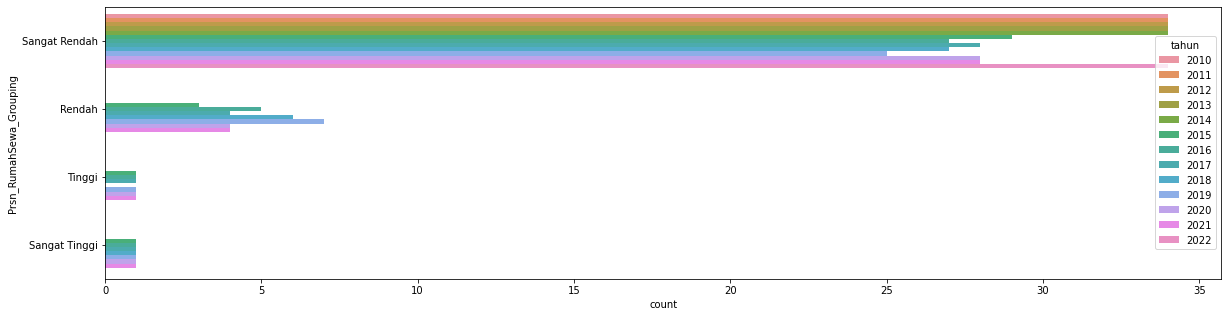

In [68]:
fig, ax = plt.subplots(figsize=(20, 5)) #atur ukuran chart
sns.countplot(ax=ax, y="Prsn_RumahSewa_Grouping",hue='tahun', data=df_gabung_2)

Dapat dilihat dari grafik diatas, setelah melalui proses grouping, data dapat dilihat dengan jelas, yang mana kolom persen rumah menyewa tertinggi dengan kategori sangat rendah, namun dilain hal, pada tiap kategorinya, ada yang dominan dan ada yang tidak, yang berarti data set menunjukkan pada tiap tahunnya persenan rumah menyewa dikategorikan sangat rendah/rendah

Grafik perbandingan antara kategori persen rumah menyewa grouping, dengan data tiap prov

<AxesSubplot:xlabel='count', ylabel='prov'>

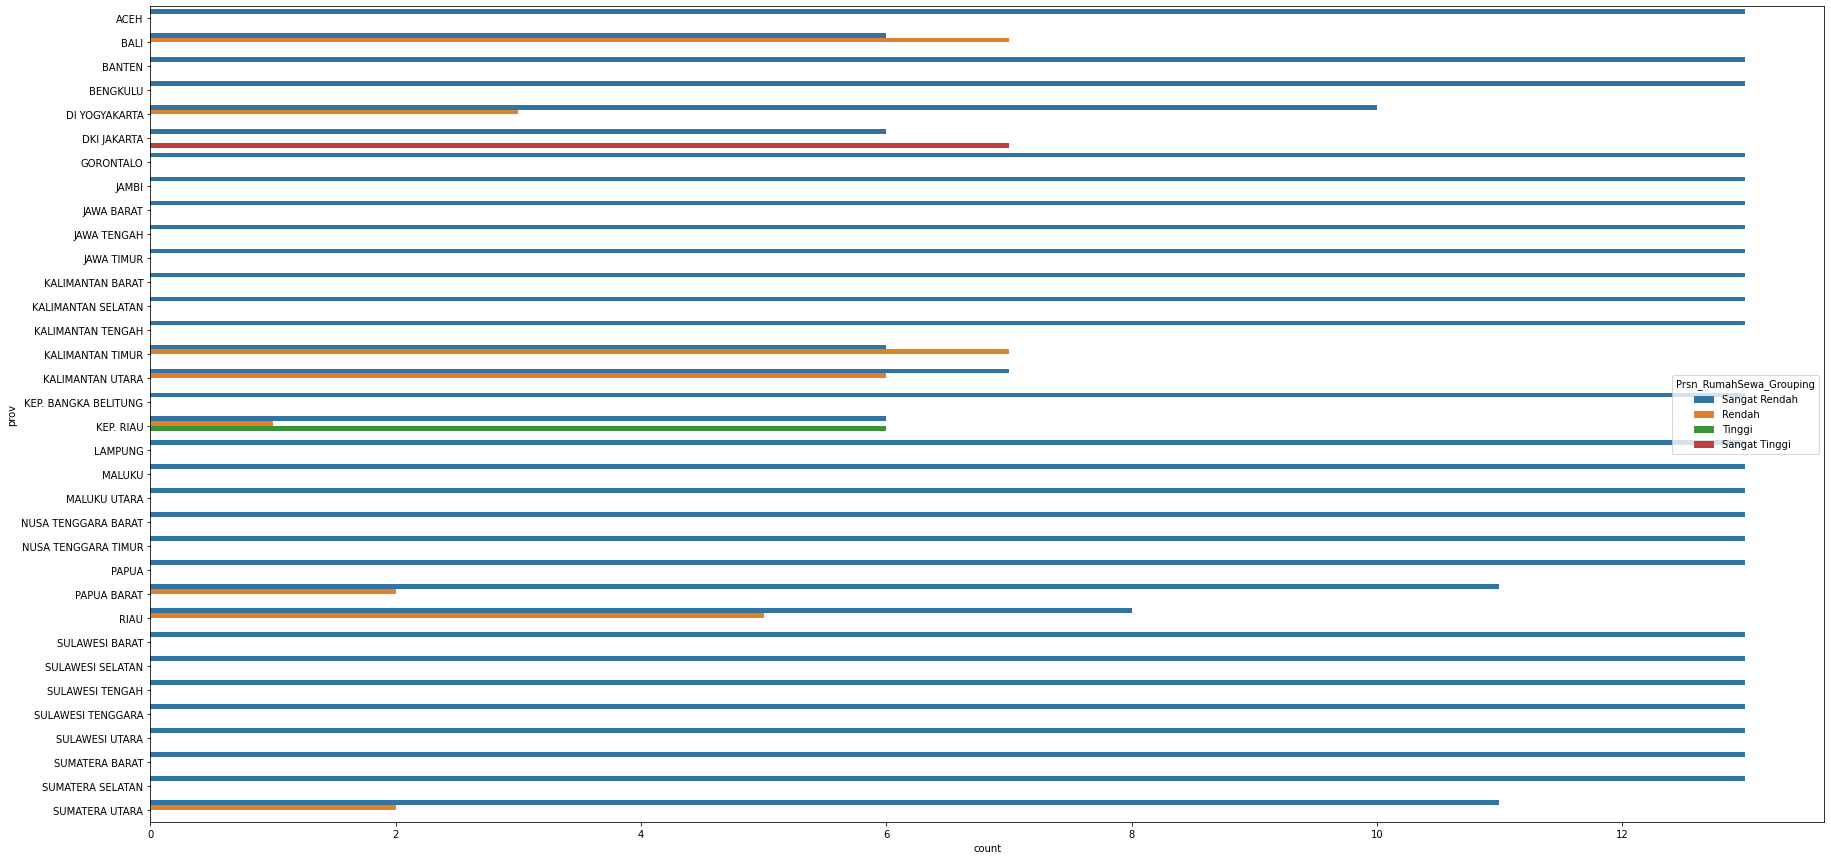

In [69]:
fig, ax = plt.subplots(figsize=(30, 15)) #atur ukuran chart
sns.countplot(ax=ax, y="prov",hue='Prsn_RumahSewa_Grouping', data=df_gabung_2)

Dapat dilihat, dari grafik diatas, data perses rumah menyewa tiap prov menunjukkan bahwa, tiap provnya mendominasi dengan kategori sangat rendah, namun daripada itu, adapula data yang memiliki kategori sangat tinggi hingga rendah

In [70]:
df_gabung_2['kepadatan_penduduk'].unique()

<IntegerArray>
[ 720,   92,  205,  133,   75,   72,   93,  102,  262,   90,
 ...
 1107,  786, 1106,  676,  243,   97,  164,   43,  173,   59]
Length: 183, dtype: Int64

In [71]:
df_gabung_2['melek_huruf_diatas15'].unique()

<FloatingArray>
[ 95.0, 98.21, 99.15, 99.17, 99.21,  98.2, 98.76, 98.01, 97.11, 98.09,
 ...
 94.99, 99.63, 97.34, 91.29,  94.1, 98.24, 92.64, 98.49, 96.88, 70.83]
Length: 146, dtype: Float64

In [72]:
df_test = df_gabung_2

In [73]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 441
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   prov                             442 non-null    category
 1   tahun                            442 non-null    int64   
 2   kategori_pmi                     442 non-null    category
 3   persen_rumah_menyewa             442 non-null    Int64   
 4   kepadatan_penduduk               442 non-null    Int64   
 5   persen_anak_dengan_akte_lahir    442 non-null    float64 
 6   persen_asupan_kalori_bawah_1400  442 non-null    float64 
 7   melek_huruf_diatas15             442 non-null    Float64 
 8   Prsn_RumahSewa_Grouping          442 non-null    category
dtypes: Float64(1), Int64(2), category(3), float64(2), int64(1)
memory usage: 28.5 KB


In [74]:
df_model = pd.get_dummies(data=df_test, columns=['Prsn_RumahSewa_Grouping'])

In [75]:
df_model = df_model.drop(['tahun', 'prov'],axis=1)

In [76]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   kategori_pmi                           442 non-null    category
 1   persen_rumah_menyewa                   442 non-null    Int64   
 2   kepadatan_penduduk                     442 non-null    Int64   
 3   persen_anak_dengan_akte_lahir          442 non-null    float64 
 4   persen_asupan_kalori_bawah_1400        442 non-null    float64 
 5   melek_huruf_diatas15                   442 non-null    Float64 
 6   Prsn_RumahSewa_Grouping_Sangat Rendah  442 non-null    uint8   
 7   Prsn_RumahSewa_Grouping_Rendah         442 non-null    uint8   
 8   Prsn_RumahSewa_Grouping_Tinggi         442 non-null    uint8   
 9   Prsn_RumahSewa_Grouping_Sangat Tinggi  442 non-null    uint8   
dtypes: Float64(1), Int64(2), category(1), float64(2), uint8(4)
mem

In [77]:
# Penentuan target
le = preprocessing.LabelEncoder()
le.fit(df_model.kategori_pmi)
Y = le.transform(df_model.kategori_pmi)

In [78]:
df_model.kategori_pmi.value_counts()

SEDANG           249
TINGGI           170
SANGAT RENDAH     15
SANGAT TINGGI      8
Name: kategori_pmi, dtype: int64

In [79]:
# Karena sudah disimpan ke variabel le, maka kategori_pmi bisa dihapus
X = df_model.drop("kategori_pmi",axis=1)

In [80]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 441
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   persen_rumah_menyewa                   442 non-null    Int64  
 1   kepadatan_penduduk                     442 non-null    Int64  
 2   persen_anak_dengan_akte_lahir          442 non-null    float64
 3   persen_asupan_kalori_bawah_1400        442 non-null    float64
 4   melek_huruf_diatas15                   442 non-null    Float64
 5   Prsn_RumahSewa_Grouping_Sangat Rendah  442 non-null    uint8  
 6   Prsn_RumahSewa_Grouping_Rendah         442 non-null    uint8  
 7   Prsn_RumahSewa_Grouping_Tinggi         442 non-null    uint8  
 8   Prsn_RumahSewa_Grouping_Sangat Tinggi  442 non-null    uint8  
dtypes: Float64(1), Int64(2), float64(2), uint8(4)
memory usage: 23.7 KB


In [81]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=123)

In [82]:
with open("C:\\KULIAH\\DatMin\\UAS\\data.pickle", 'wb') as fp:
    pickle.dump(X_train.columns, fp)

In [83]:
clf = GaussianNB()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

Akurasi 0.6390977443609023
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.00      0.00      0.00         1
           2       0.63      0.97      0.77        80
           3       0.86      0.12      0.22        48

    accuracy                           0.64       133
   macro avg       0.50      0.34      0.33       133
weighted avg       0.71      0.64      0.55       133



In [84]:
import warnings
warnings.filterwarnings('always')

In [85]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

Akurasi 0.7218045112781954
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         1
           2       0.73      0.86      0.79        80
           3       0.73      0.56      0.64        48

    accuracy                           0.72       133
   macro avg       0.36      0.36      0.36       133
weighted avg       0.70      0.72      0.70       133



C:\Users\raisy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\raisy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\raisy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
clf = RandomForestClassifier(n_estimators=50, random_state=123)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))


Akurasi 0.7518796992481203
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         1
           2       0.75      0.89      0.81        80
           3       0.78      0.60      0.68        48

    accuracy                           0.75       133
   macro avg       0.38      0.37      0.37       133
weighted avg       0.73      0.75      0.73       133



C:\Users\raisy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\raisy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\raisy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
clf = xgb.XGBClassifier(objective = "multi:softprob", num_class = 4, eval_metric = "mlogloss", max_depth = 24, gamma=0.1, subsample = 0.90,learning_rate=0.01, n_estimators = 10, nthread=-1)
# num_class adalah jumlah kelas
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
mm_scaler = preprocessing.MinMaxScaler()
X_train_minmax = mm_scaler.fit_transform(X_train)
X_test_minmax = mm_scaler.transform(X_test)
print(classification_report(Y_test, Y_pred))

Akurasi 0.706766917293233
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         1
           2       0.71      0.86      0.78        80
           3       0.71      0.52      0.60        48

    accuracy                           0.71       133
   macro avg       0.36      0.35      0.35       133
weighted avg       0.69      0.71      0.69       133



C:\Users\raisy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\raisy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\raisy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
mm_scaler = preprocessing.MinMaxScaler()
X_train_minmax = mm_scaler.fit_transform(X_train)
X_test_minmax = mm_scaler.transform(X_test)


ss_scaler = preprocessing.StandardScaler()
X_train_ss = mm_scaler.fit_transform(X_train)
X_test_ss = mm_scaler.transform(X_test)

In [89]:
clf = RandomForestClassifier(n_estimators=50, random_state=123)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

Akurasi 0.7518796992481203
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         1
           2       0.75      0.89      0.81        80
           3       0.78      0.60      0.68        48

    accuracy                           0.75       133
   macro avg       0.38      0.37      0.37       133
weighted avg       0.73      0.75      0.73       133



C:\Users\raisy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\raisy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\raisy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [110]:
feature_importances = pd.DataFrame(clf.feature_importances_,index = X_train.columns, columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances.head(30))

                                       importance
kepadatan_penduduk                       0.305359
persen_rumah_menyewa                     0.215059
persen_anak_dengan_akte_lahir            0.192224
melek_huruf_diatas15                     0.118732
persen_asupan_kalori_bawah_1400          0.096188
Prsn_RumahSewa_Grouping_Sangat Rendah    0.043301
Prsn_RumahSewa_Grouping_Rendah           0.017515
Prsn_RumahSewa_Grouping_Sangat Tinggi    0.011616
Prsn_RumahSewa_Grouping_Tinggi           0.000006


In [90]:
joblib.dump(clf, "C:\\KULIAH\\DatMin\\UAS\\data.joblib")

['C:\\KULIAH\\DatMin\\UAS\\data.joblib']

In [91]:
df_final = pd.get_dummies(data=df_test, columns=['Prsn_RumahSewa_Grouping'])

In [92]:
with open ('C:\\KULIAH\\DatMin\\UAS\\data.pickle', 'rb') as fp:
    X_train_column = list(pickle.load(fp))
    
df_prediksi = df_final[X_train_column]

In [93]:
#proses prediksi dengan menggunakan model yang sebelumnya telah dibuat
import joblib
clf = joblib.load("C:\\KULIAH\\DatMin\\UAS\\data.joblib")
df_prediksi['kategori_pmi'] = clf.predict(df_prediksi)

C:\Users\raisy\AppData\Local\Temp\ipykernel_18920\803076382.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prediksi['kategori_pmi'] = clf.predict(df_prediksi)


In [94]:
df_prediksi['kategori_pmi'].value_counts()

2    288
3    138
0     10
1      6
Name: kategori_pmi, dtype: int64

In [96]:
df_prediksi['kategori_pmi'].unique()

array([2, 3, 1, 0])

In [99]:
final_df = df_gabung_2

In [100]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 441
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   prov                             442 non-null    category
 1   tahun                            442 non-null    int64   
 2   kategori_pmi                     442 non-null    category
 3   persen_rumah_menyewa             442 non-null    Int64   
 4   kepadatan_penduduk               442 non-null    Int64   
 5   persen_anak_dengan_akte_lahir    442 non-null    float64 
 6   persen_asupan_kalori_bawah_1400  442 non-null    float64 
 7   melek_huruf_diatas15             442 non-null    Float64 
 8   Prsn_RumahSewa_Grouping          442 non-null    category
dtypes: Float64(1), Int64(2), category(3), float64(2), int64(1)
memory usage: 28.5 KB


In [102]:
final_df = final_df.drop(["kategori_pmi", "persen_rumah_menyewa", "kepadatan_penduduk", "persen_anak_dengan_akte_lahir", \
                         "persen_asupan_kalori_bawah_1400", "melek_huruf_diatas15", "Prsn_RumahSewa_Grouping"],axis=1)

In [104]:
final_df['kategori_pmi'] = df_prediksi['kategori_pmi']

In [105]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 441
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   prov          442 non-null    category
 1   tahun         442 non-null    int64   
 2   kategori_pmi  442 non-null    int32   
dtypes: category(1), int32(1), int64(1)
memory usage: 10.4 KB


In [108]:
final_df['kategori_pmi'].replace({0:"SANGAT RENDAH",1:"SEDANG", 2:"TINGGI", 3:"SANGAT TINGGI"}, inplace=True)

In [109]:
final_df.head(5)

,prov,tahun,kategori_pmi
0,ACEH,2022,TINGGI
1,SUMATERA UTARA,2022,TINGGI
2,SUMATERA BARAT,2022,TINGGI
3,RIAU,2022,TINGGI
4,JAMBI,2022,TINGGI


In [111]:
final_df.to_csv("C:\\KULIAH\\DatMin\\UAS\\predict.csv", index=False)